connect to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

download input image and show it

In [3]:
input_img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv.pgm", cv2.IMREAD_GRAYSCALE)

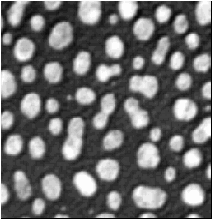

In [4]:
cv2_imshow(input_img)

In [5]:
print(input_img.shape)

(219, 212)


In [6]:
nrows = input_img.shape[0]
ncols = input_img.shape[1]

Exercise 04b. Implement a program 'exercise_04b_closing' that performs a morphological closing of size 'i' using a square of size (2*i +1)x(2*i +1):\
exercise_04b_closing i exercise_04b_input_01.pgm exercise_04b_output_01.pgm\
Note: 8-connectivity is assumed.\
Use the property of computing an closing of size i in terms of elementary closing of size 1.

perform opening of size 1 and then 2\
size i:
(2*i+1)X(2*i+1)

CLOSING = Dilation and then a Erosion

In [7]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [8]:
#maximum of neighborhood

def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

In [9]:
#minimum of neighborhood

def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

In [ ]:
def closing(input_img, i):
  step1 = dilation(input_img, i)
  step2 = erosion(step1, i)
  return step2

In [ ]:
out_1 = closing(input_img, 1)

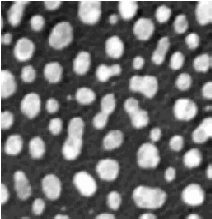

In [12]:
cv2_imshow(out_1)

In [ ]:
out_2 = closing(input_img, 2)

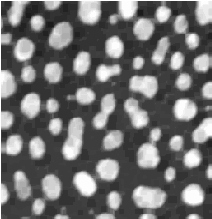

In [15]:
cv2_imshow(out_2)

Test the result 

In [16]:
true_output1 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv_20051123_clo1.pgm", cv2.IMREAD_GRAYSCALE)

In [17]:
true_output2 = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_0X/immed_gray_inv_20051123_clo2.pgm", cv2.IMREAD_GRAYSCALE)

In [18]:
def compare(I1, I2):

  output = 0

  shape1 = I1.shape
  shape2 = I2.shape

  #first check if have the same shape
  if shape1 != shape2:
    return output

  nrows = I1.shape[0]
  ncols = I2.shape[1]

  for i in range(nrows):
    for j in range(ncols):
      if I1[i][j] != I2[i][j]:
        return output

  #the two images matches
  output = 1
  return output

In [19]:
compare(true_output1, out_1)

1

In [20]:
compare(true_output2, out_2)

1

Save the results

In [21]:
import os
os.chdir('/content/drive/MyDrive/Image Analysis/Ex_0X')

In [22]:
!ls

 cam_74.pgm				     image1.pgm
 cam_74_threshold100.pgm		     image1_sup_image2.pgm
 ex_11a.ipynb				     image2.pgm
 exercise_02a_thresh.ipynb		     immed_gray_inv_20051123_clo1.pgm
 exercise_02b_compare.ipynb		     immed_gray_inv_20051123_clo2.pgm
 exercise_02c_sup.ipynb			     immed_gray_inv_20051123_dil1.pgm
 exercise_03a_erosion.ipynb		     immed_gray_inv_20051123_dil2.pgm
 exercise_03b_dilation.ipynb		     immed_gray_inv_20051123_ero1.pgm
 exercise_04a_opening.ipynb		     immed_gray_inv_20051123_ero2.pgm
'exercise_04b_             closing .ipynb'   immed_gray_inv_20051123_ope1.pgm
 Exercises_01a_1.pdf			     immed_gray_inv_20051123_ope2.pgm
 first_ex.ipynb				     immed_gray_inv.pgm
 image1_inf_image2.pgm


In [23]:
cv2.imwrite('exercise_04b_output_01.pgm', out_1)
cv2.imwrite('exercise_04b_output_02.pgm', out_2)

True

In [25]:
!ls

 cam_74.pgm				     first_ex.ipynb
 cam_74_threshold100.pgm		     image1_inf_image2.pgm
 ex_11a.ipynb				     image1.pgm
 exercise_02a_thresh.ipynb		     image1_sup_image2.pgm
 exercise_02b_compare.ipynb		     image2.pgm
 exercise_02c_sup.ipynb			     immed_gray_inv_20051123_clo1.pgm
 exercise_03a_erosion.ipynb		     immed_gray_inv_20051123_clo2.pgm
 exercise_03b_dilation.ipynb		     immed_gray_inv_20051123_dil1.pgm
 exercise_04a_opening.ipynb		     immed_gray_inv_20051123_dil2.pgm
 exercise_04a_output_01.pgm		     immed_gray_inv_20051123_ero1.pgm
 exercise_04a_output_02.pgm		     immed_gray_inv_20051123_ero2.pgm
'exercise_04b_             closing .ipynb'   immed_gray_inv_20051123_ope1.pgm
 exercise_04b_output_01.pgm		     immed_gray_inv_20051123_ope2.pgm
 exercise_04b_output_02.pgm		     immed_gray_inv.pgm
 Exercises_01a_1.pdf


In [27]:
from exercise_02b_compare.ipynb import compare

ModuleNotFoundError: ignored